<h3 style="font-size: 30px;">Data Science Regression Project: Predicting Home Prices in Banglore</h3>

In [7]:
!pip install pandas matplotlib numpy



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

<h1 style="font-size: 25px;">Data Loading</h1>

In [9]:
df1 = pd.read_csv(r"C:\Users\manvi\Downloads\Bengaluru_House_Data.csv")
print(df1.head())

              area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00  


In [10]:
df1.shape


(13320, 9)

In [11]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [12]:
df2 = df1.drop(['area_type','society','balcony','availability'], axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


<h1 style="font-size: 25px;">Data Cleaning: Handle NA values</h3>

In [13]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [14]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [15]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

<h1 style="font-size: 25px;">Feature Engineering - Add new feature(integer) for bhk (Bedrooms Hall Kitchen)</h1>

In [16]:
df3.loc[:, 'bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\manvi\AppData\Local\Temp\ipykernel_9772\4045510373.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.loc[:, 'bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [17]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [18]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [19]:
df3 = df3.drop('size', axis='columns')

In [20]:
df3.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [21]:
df3[df3.bhk>20]

,location,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,8000,27.0,230.0,27
4684,Munnekollal,2400,40.0,660.0,43


In [22]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      shape=(2067,), dtype=object)

In [23]:
def isFloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [24]:
df3[df3['total_sqft'].apply(isFloat)]

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453,4.0,231.00,5
13316,Richards Town,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2
13318,Padmanabhanagar,4689,4.0,488.00,4


In [25]:
df3[~df3['total_sqft'].apply(isFloat)].head(10)


,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2
648,Arekere,4125Perch,9.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,445.000,4


In [26]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [27]:
convert_sqft_to_num('2344')

2344.0

In [28]:
convert_sqft_to_num('2100 - 2850') 

2475.0

In [29]:
df4 = df3.copy()

In [30]:
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)

In [31]:
df4.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [32]:
df4.loc[30]

location      Yelahanka
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [33]:
df5 = df4.copy()

<h1 style="font-size: 25px;">Feature Engineering - Add new feature called price per square feet</h1>

In [34]:
 df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']

In [35]:
df5.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [36]:
len(df5.location.unique())

1304

In [37]:
# Check if elements are strings before splitting
df5['location'] = df5['location'].apply(
    lambda x: x.split(' ') if isinstance(x, str) else x
)

# Count occurrences of each location (after splitting)
location_stats = (
    df5.explode('location')           # Split lists into individual rowslen 
    .groupby('location')              # Group by individual words
    .size()                           # Count occurrences
    .sort_values(ascending=False)     # Sort by frequency
)

print(location_stats)


location
Nagar         1684
Road          1632
Layout        1009
Phase          594
Whitefield     536
              ... 
sector,          1
sarjapura        1
sapthagiri       1
sankeswari       1
sa               1
Length: 1331, dtype: int64


In [38]:
len(location_stats[location_stats<=10])


1036

<h1 style="font-size: 25px;">Dimensionality Reduction</h1>

Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [39]:
loc_stats_less_than_10 = location_stats[location_stats<=10]
loc_stats_less_than_10

location
Akshayanagara      10
Richmond           10
Nagadevanahalli    10
Naganathapura      10
Nagappa            10
                   ..
sector,             1
sarjapura           1
sapthagiri          1
sankeswari          1
sa                  1
Length: 1036, dtype: int64

In [40]:
df5.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,"[Electronic, City, Phase, II]",1056.0,2.0,39.07,2,3699.810606
1,"[Chikka, Tirupathi]",2600.0,5.0,120.00,4,4615.384615
2,[Uttarahalli],1440.0,2.0,62.00,3,4305.555556
3,[Lingadheeranahalli],1521.0,3.0,95.00,3,6245.890861
4,[Kothanur],1200.0,2.0,51.00,2,4250.000000


In [41]:
df5.head()


,location,total_sqft,bath,price,bhk,price_per_sqft
0,"[Electronic, City, Phase, II]",1056.0,2.0,39.07,2,3699.810606
1,"[Chikka, Tirupathi]",2600.0,5.0,120.00,4,4615.384615
2,[Uttarahalli],1440.0,2.0,62.00,3,4305.555556
3,[Lingadheeranahalli],1521.0,3.0,95.00,3,6245.890861
4,[Kothanur],1200.0,2.0,51.00,2,4250.000000


In [42]:
df5['location'].head()

0    [Electronic, City, Phase, II]
1              [Chikka, Tirupathi]
2                    [Uttarahalli]
3             [Lingadheeranahalli]
4                       [Kothanur]
Name: location, dtype: object

In [43]:
df5['location'] = df5['location'].apply(lambda x: tuple(x) if isinstance(x, list) else x)

In [44]:
df5['location'].unique()

array([('Electronic', 'City', 'Phase', 'II'), ('Chikka', 'Tirupathi'),
       ('Uttarahalli',), ...,
       ('12th', 'cross', 'srinivas', 'nagar', 'banshankari', '3rd', 'stage'),
       ('Havanur', 'extension'), ('Abshot', 'Layout')],
      shape=(1304,), dtype=object)

In [45]:
df5.location = df5.location.apply(lambda x: 'other' if x in loc_stats_less_than_10 else x)
len(df5.location.unique())

1304

In [46]:
df5.head(10)

,location,total_sqft,bath,price,bhk,price_per_sqft
0,"(Electronic, City, Phase, II)",1056.0,2.0,39.07,2,3699.810606
1,"(Chikka, Tirupathi)",2600.0,5.0,120.00,4,4615.384615
2,"(Uttarahalli,)",1440.0,2.0,62.00,3,4305.555556
3,"(Lingadheeranahalli,)",1521.0,3.0,95.00,3,6245.890861
4,"(Kothanur,)",1200.0,2.0,51.00,2,4250.000000
5,"(Whitefield,)",1170.0,2.0,38.00,2,3247.863248
6,"(Old, Airport, Road)",2732.0,4.0,204.00,4,7467.057101
7,"(Rajaji, Nagar)",3300.0,4.0,600.00,4,18181.818182
8,"(Marathahalli,)",1310.0,3.0,63.25,3,4828.244275
9,"(Gandhi, Bazar)",1020.0,6.0,370.00,6,36274.509804


In [47]:
loc_stats_less_than_10.head()

location
Akshayanagara      10
Richmond           10
Nagadevanahalli    10
Naganathapura      10
Nagappa            10
dtype: int64

<h1 style="font-size: 25px;">Outlier Removal Using Business Logic</h1>

As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft


In [48]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,total_sqft,bath,price,bhk,price_per_sqft
9,"(Gandhi, Bazar)",1020.0,6.0,370.0,6,36274.509804
45,"(HSR, Layout)",600.0,9.0,200.0,8,33333.333333
58,"(Murugeshpalya,)",1407.0,4.0,150.0,6,10660.980810
68,"(Devarachikkanahalli,)",1350.0,7.0,85.0,8,6296.296296
70,"(Double, Road)",500.0,3.0,100.0,3,20000.000000


In [49]:
df5.shape

(13246, 6)

In [50]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12502, 6)

In [51]:
df6.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,"(Electronic, City, Phase, II)",1056.0,2.0,39.07,2,3699.810606
1,"(Chikka, Tirupathi)",2600.0,5.0,120.00,4,4615.384615
2,"(Uttarahalli,)",1440.0,2.0,62.00,3,4305.555556
3,"(Lingadheeranahalli,)",1521.0,3.0,95.00,3,6245.890861
4,"(Kothanur,)",1200.0,2.0,51.00,2,4250.000000


<h1 style="font-size: 25px;">Outlier Removal Using Standard Deviation and Mean</h1>

In [52]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [53]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df7 = remove_pps_outliers(df6)
df7.shape

df7.head(10)

,location,total_sqft,bath,price,bhk,price_per_sqft
0,"(, Devarabeesana, Halli)",1672.0,3.0,150.0,3,8971.291866
1,"(, Devarabeesana, Halli)",1750.0,3.0,149.0,3,8514.285714
2,"(, Devarabeesana, Halli)",1750.0,3.0,150.0,3,8571.428571
3,"(, Devarachikkanahalli)",1250.0,2.0,44.0,3,3520.000000
4,"(, Devarachikkanahalli)",1250.0,2.0,40.0,2,3200.000000
5,"(, Devarachikkanahalli)",1200.0,2.0,83.0,2,6916.666667
6,"(, Devarachikkanahalli)",1170.0,2.0,40.0,2,3418.803419
7,"(, Devarachikkanahalli)",1425.0,2.0,65.0,3,4561.403509
8,"(, Devarachikkanahalli)",947.0,2.0,43.0,2,4540.654699
9,"(, Devarachikkanahalli)",1130.0,2.0,36.0,2,3185.840708


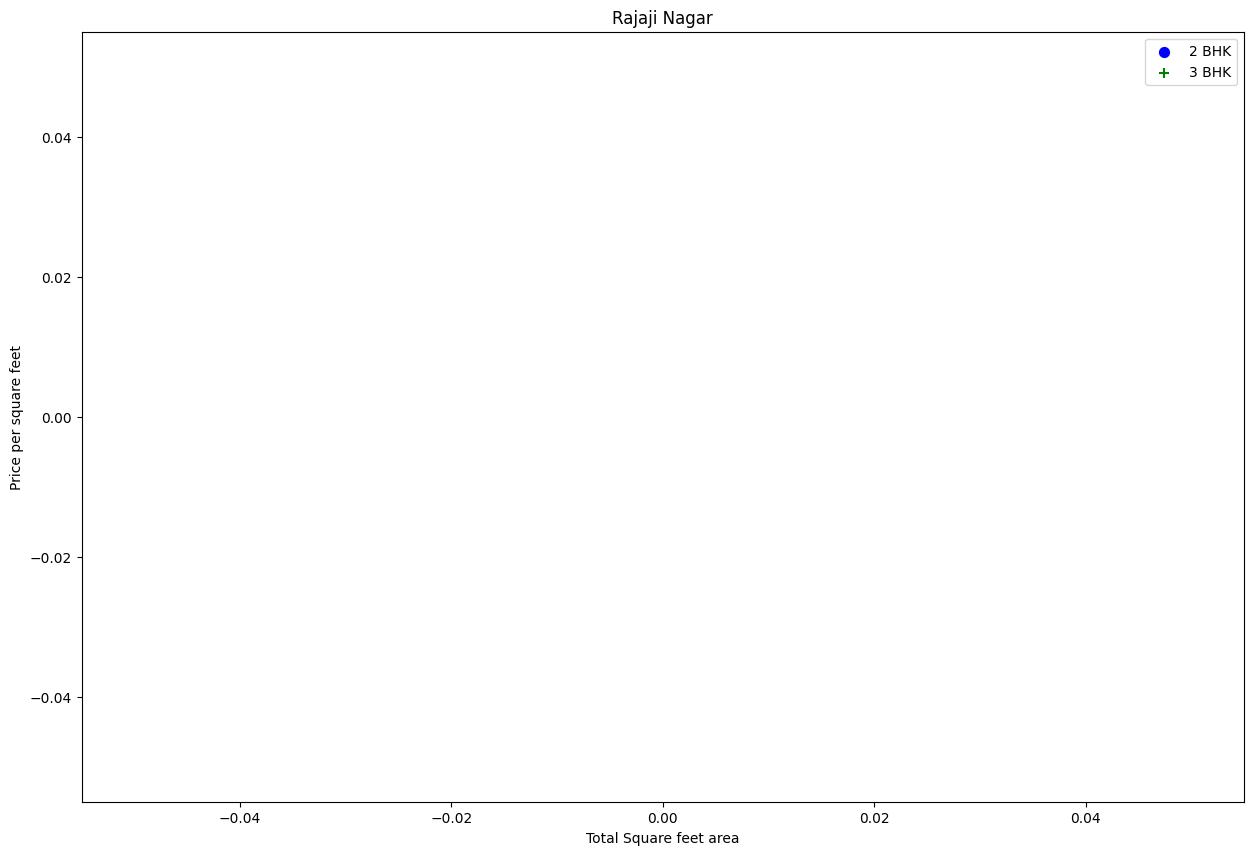

In [54]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price_per_sqft, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price_per_sqft, marker='+', color='green', label='3 BHK', s=50) # Corrected line
    plt.xlabel("Total Square feet area")
    plt.ylabel("Price per square feet")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df7,('Rajaji Nagar'))

In [55]:
df7['location'].unique()

array([('', 'Devarabeesana', 'Halli'), ('', 'Devarachikkanahalli'),
       ('', 'Electronic', 'City'), ('', 'Mysore', 'Highway'),
       ('', 'Rachenahalli'), ('', 'Thanisandra'), ('', 'south'),
       ('1st', 'Block', 'BEL', 'Layout'),
       ('1st', 'Block', 'HBR', 'Layout'),
       ('1st', 'Block', 'HRBR', 'Layout'), ('1st', 'Block', 'Jayanagar'),
       ('1st', 'Block', 'Koramangala'), ('1st', 'Phase', 'JP', 'Nagar'),
       ('1st', 'Stage', 'Indira', 'Nagar'),
       ('2nd', 'Block', 'Hrbr', 'Layout'), ('2nd', 'Block', 'Jayanagar'),
       ('2nd', 'Phase', 'JP', 'Nagar'),
       ('2nd', 'Phase', 'Judicial', 'Layout'),
       ('2nd', 'Stage', 'Arekere', 'Mico', 'Layout'),
       ('2nd', 'Stage', 'Nagarbhavi'), ('3rd', 'Block', 'Banashankari'),
       ('3rd', 'Block', 'Hrbr', 'Layout'), ('3rd', 'Block', 'Jayanagar'),
       ('3rd', 'Block', 'Koramangala'), ('3rd', 'Phase', 'JP', 'Nagar'),
       ('4th', 'Block', 'Jayanagar'), ('4th', 'Block', 'Koramangala'),
       ('4th', 'Phase', 

In [56]:
def process_location_tuple(loc_tuple):
    if isinstance(loc_tuple, tuple):
        return ' '.join(part for part in loc_tuple if part and str(part).strip() != '')
    else:
        return str(loc_tuple)

df7['location'] = df7['location'].apply(process_location_tuple)


In [57]:
df7.location.head()

0    Devarabeesana Halli
1    Devarabeesana Halli
2    Devarabeesana Halli
3    Devarachikkanahalli
4    Devarachikkanahalli
Name: location, dtype: object

In [58]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        # Initialize bhk_stats as a dictionary, not a tuple
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):

            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk - 1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

df8 = remove_bhk_outliers(df7)
df8.shape

(7508, 6)

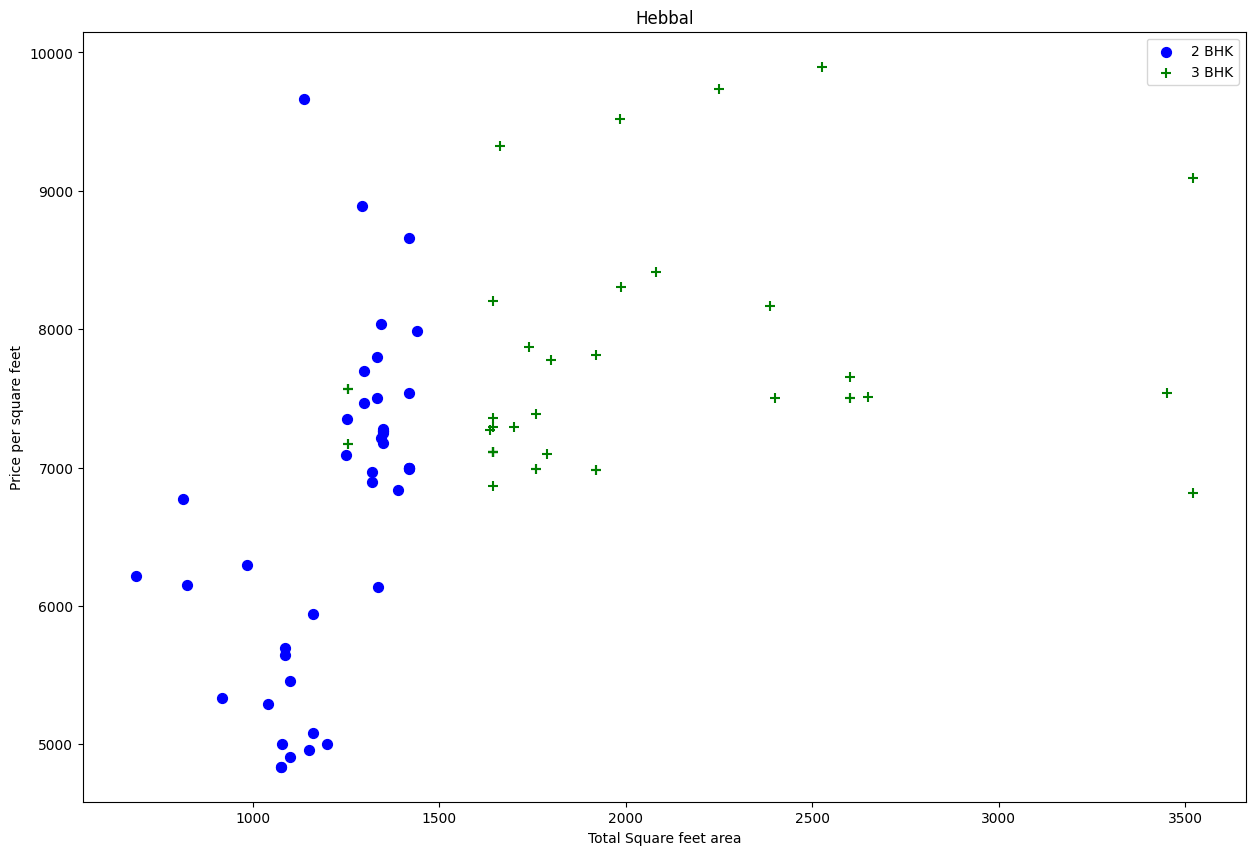

In [59]:
plot_scatter_chart(df8,'Hebbal')

Text(0, 0.5, 'Count')

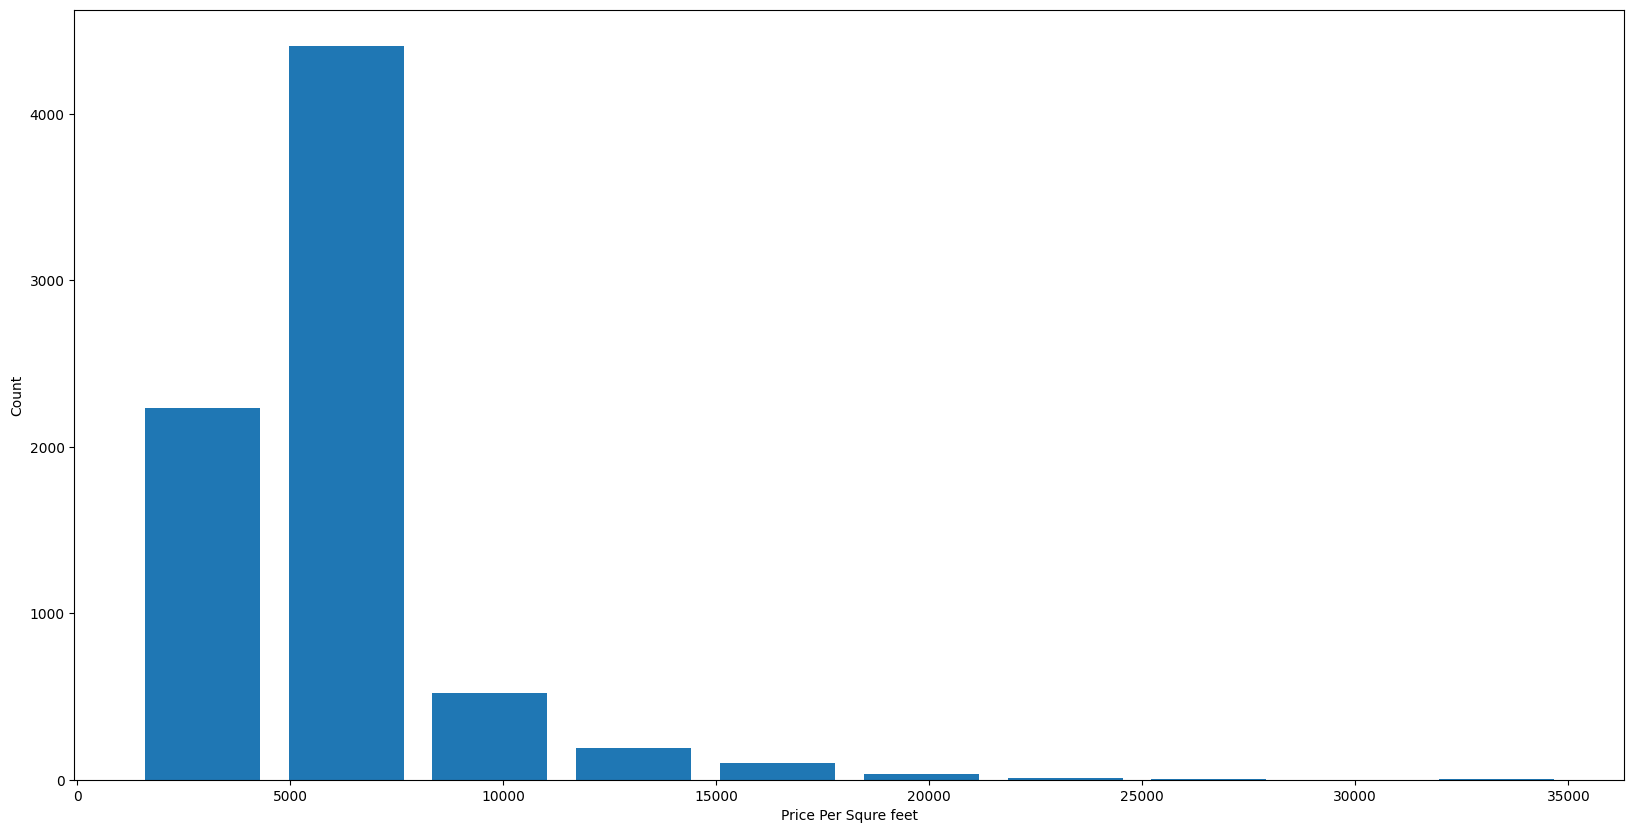

In [60]:
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Squre feet")
plt.ylabel("Count")

<h1 style="font-size: 25px;">Outlier Removal Using Bathrooms Feature</h1>

In [61]:
df8.bath.unique()

array([ 3.,  2.,  1.,  4.,  5.,  8.,  9.,  6., 14.,  7., 12.])

In [62]:
df8[df8.bath>10]

,location,total_sqft,bath,price,bhk,price_per_sqft
779,BTM 1st Stage,3300.0,14.0,500.0,9,15151.515152
6181,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000


Text(0, 0.5, 'Count')

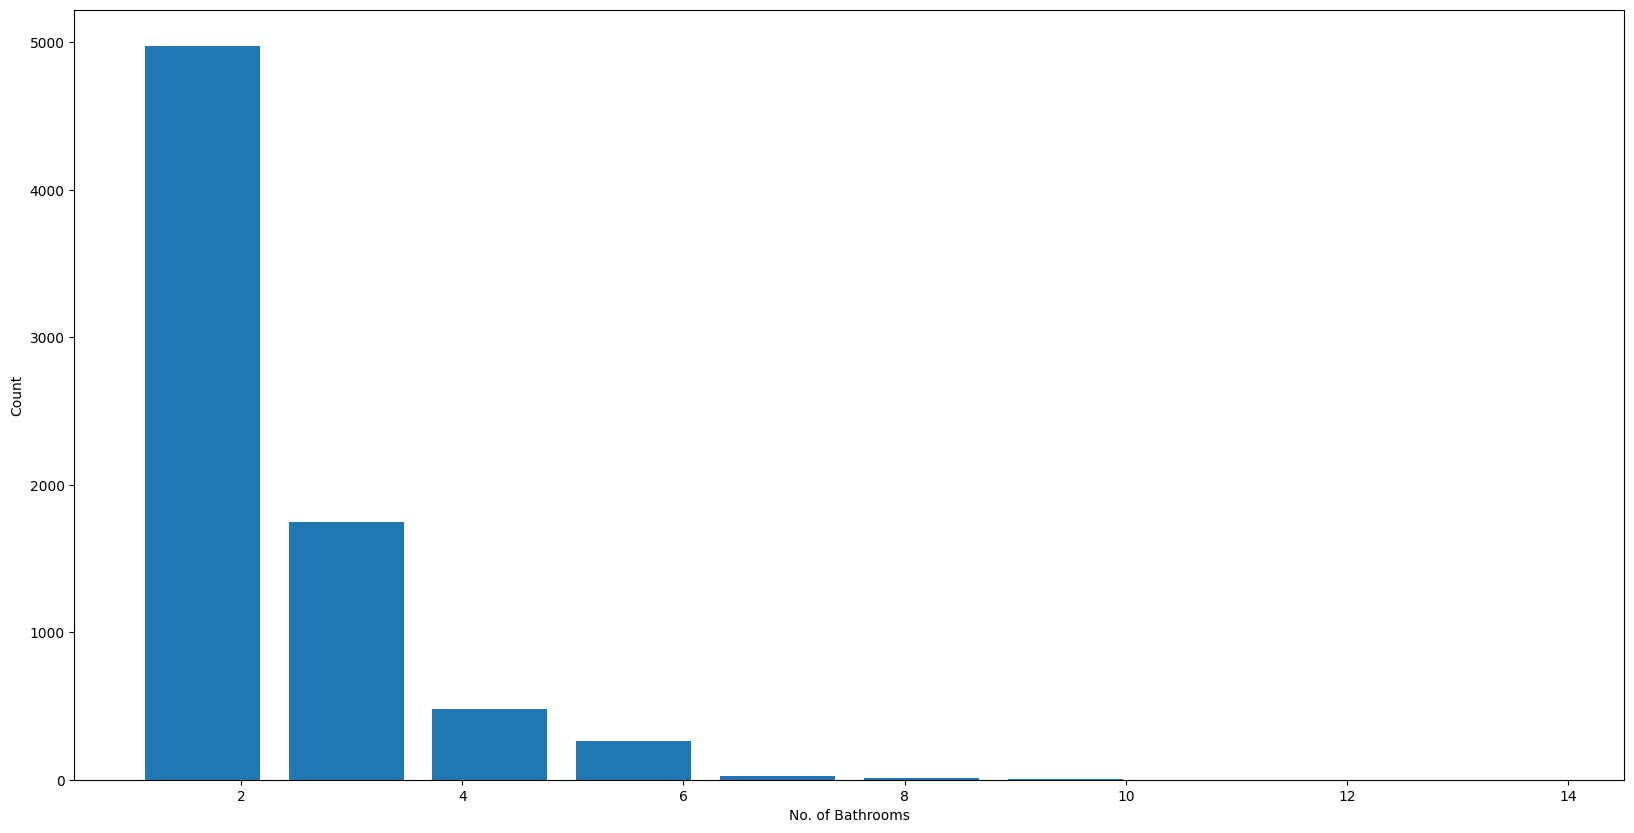

In [63]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("No. of Bathrooms")
plt.ylabel("Count")

It is unusual to have 2 more bathrooms than number of bedrooms in a home

In [64]:
df8[df8.bath>df8.bhk+2]

,location,total_sqft,bath,price,bhk,price_per_sqft
779,BTM 1st Stage,3300.0,14.0,500.0,9,15151.515152
1972,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
6115,Nagasandra,7000.0,8.0,450.0,4,6428.571429
7429,Sathya Sai Layout,11338.0,9.0,1000.0,6,8819.897689
7908,Thanisandra,1806.0,6.0,116.0,3,6423.034330


Again the business manager has a conversation with you (i.e. a data scientist) that if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed

In [65]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7429, 6)

In [66]:
df10 = df9.drop(['price_per_sqft'],axis = 'columns')
df10.head()

,location,total_sqft,bath,price,bhk
0,Devarabeesana Halli,1672.0,3.0,150.0,3
1,Devarabeesana Halli,1750.0,3.0,149.0,3
2,Devarabeesana Halli,1750.0,3.0,150.0,3
4,Devarachikkanahalli,1250.0,2.0,40.0,2
5,Devarachikkanahalli,1200.0,2.0,83.0,2


<h1 style="font-size: 25px;">Use One Hot Encoding For Location</h1>

In [71]:
dummies = pd.get_dummies(df10.location,dtype=int)
dummies.head(3)

,1st Block BEL Layout,1st Block HBR Layout,1st Block HRBR Layout,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,1st Stage Indira Nagar,2nd Block Hrbr Layout,2nd Block Jayanagar,2nd Phase JP Nagar,...,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur,Yeshwanthpur Industrial Suburb,frazertown,manyata park,south,tc.palya
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
print(dummies.columns) 

Index(['1st Block BEL Layout', '1st Block HBR Layout', '1st Block HRBR Layout',
       '1st Block Jayanagar', '1st Block Koramangala', '1st Phase JP Nagar',
       '1st Stage Indira Nagar', '2nd Block Hrbr Layout',
       '2nd Block Jayanagar', '2nd Phase JP Nagar',
       ...
       'Yelahanka', 'Yelahanka New Town', 'Yelenahalli', 'Yemlur',
       'Yeshwanthpur', 'Yeshwanthpur Industrial Suburb', 'frazertown',
       'manyata park', 'south', 'tc.palya'],
      dtype='object', length=760)


In [74]:
print('other' in dummies.columns)

False


In [75]:
df11 = df10.drop('location',axis='columns')
df11.head(2)

,total_sqft,bath,price,bhk
0,1672.0,3.0,150.0,3
1,1750.0,3.0,149.0,3


In [95]:
X_base = df11[['total_sqft', 'bath', 'bhk']]

print("\nX_base DataFrame head (numerical features):")
print(X_base.head())


X_base DataFrame head (numerical features):
   total_sqft  bath  bhk
0      1672.0   3.0    3
1      1750.0   3.0    3
2      1750.0   3.0    3
4      1250.0   2.0    2
5      1200.0   2.0    2


In [138]:
X = pd.concat([X_base, dummies], axis='columns')

# Define your target variable 'y' (assuming 'price' is your target)
y = df11.price # Or whatever your price column is named

print("\nFinal X DataFrame head (all features including locations):")
print(X.head())
print("\nFinal X DataFrame columns:")
print(X.columns)


Final X DataFrame head (all features including locations):
   total_sqft  bath  bhk  1st Block BEL Layout  1st Block HBR Layout  \
0      1672.0   3.0    3                     0                     0   
1      1750.0   3.0    3                     0                     0   
2      1750.0   3.0    3                     0                     0   
4      1250.0   2.0    2                     0                     0   
5      1200.0   2.0    2                     0                     0   

   1st Block HRBR Layout  1st Block Jayanagar  1st Block Koramangala  \
0                      0                    0                      0   
1                      0                    0                      0   
2                      0                    0                      0   
4                      0                    0                      0   
5                      0                    0                      0   

   1st Phase JP Nagar  1st Stage Indira Nagar  ...  Yelahanka  \
0        

In [139]:
print(X.columns)

Index(['total_sqft', 'bath', 'bhk', '1st Block BEL Layout',
       '1st Block HBR Layout', '1st Block HRBR Layout', '1st Block Jayanagar',
       '1st Block Koramangala', '1st Phase JP Nagar', '1st Stage Indira Nagar',
       ...
       'Yelahanka', 'Yelahanka New Town', 'Yelenahalli', 'Yemlur',
       'Yeshwanthpur', 'Yeshwanthpur Industrial Suburb', 'frazertown',
       'manyata park', 'south', 'tc.palya'],
      dtype='object', length=763)


In [119]:
print(y.head())

0    150.0
1    149.0
2    150.0
4     40.0
5     83.0
Name: price, dtype: float64


<h1 style="font-size: 25px;">Building a Model Now</h1>

In [141]:
df11.shape

(7429, 4)

In [140]:
X.shape

(7429, 763)

In [142]:
y = df11.price
y.head(3)

0    150.0
1    149.0
2    150.0
Name: price, dtype: float64

In [124]:
len(y)

7429

In [125]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [143]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [144]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.6638365610876178

<h1 style="font-size: 25px;">Use K Fold cross validation to measure accuracy of our LinearRegression model</h1>

In [145]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.68634254, 0.6961796 , 0.72228743, 0.77652492, 0.69052709])

We can see that in 5 iterations we get a score above 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose

<h1 style="font-size: 25px;">Finding best model using GridSearchCV</h1>

In [146]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, ShuffleSplit, train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler # Import StandardScaler for potential future use

# Assuming X and y are already defined from your previous steps
# For demonstration, let's create dummy X and y
# import numpy as np
# X = pd.DataFrame(np.random.rand(100, 10))
# y = pd.Series(np.random.rand(100))

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False] # Example of a valid parameter
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                # Updated deprecated criterion values to their modern equivalents
                'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'], # 'mse' is now 'squared_error'
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algo_name, config in algos.items():
        print(f"Fitting {algo_name}...")
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False, n_jobs=-1) # Added n_jobs=-1 for faster computation
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
        print(f"Finished {algo_name}.")

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# If you want to run it on the full X, y (as in your original code):
find_best_model_using_gridsearchcv(X, y)

Fitting linear_regression...
Finished linear_regression.
Fitting lasso...
Finished lasso.
Fitting decision_tree...
Finished decision_tree.


,model,best_score,best_params
0,linear_regression,0.715306,{'fit_intercept': False}
1,lasso,0.592030,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.712495,"{'criterion': 'poisson', 'splitter': 'best'}"


In [148]:
print(dummies.head())

   1st Block BEL Layout  1st Block HBR Layout  1st Block HRBR Layout  \
0                     0                     0                      0   
1                     0                     0                      0   
2                     0                     0                      0   
4                     0                     0                      0   
5                     0                     0                      0   

   1st Block Jayanagar  1st Block Koramangala  1st Phase JP Nagar  \
0                    0                      0                   0   
1                    0                      0                   0   
2                    0                      0                   0   
4                    0                      0                   0   
5                    0                      0                   0   

   1st Stage Indira Nagar  2nd Block Hrbr Layout  2nd Block Jayanagar  \
0                       0                      0                    0   
1     

In [147]:
print(dummies.columns)

Index(['1st Block BEL Layout', '1st Block HBR Layout', '1st Block HRBR Layout',
       '1st Block Jayanagar', '1st Block Koramangala', '1st Phase JP Nagar',
       '1st Stage Indira Nagar', '2nd Block Hrbr Layout',
       '2nd Block Jayanagar', '2nd Phase JP Nagar',
       ...
       'Yelahanka', 'Yelahanka New Town', 'Yelenahalli', 'Yemlur',
       'Yeshwanthpur', 'Yeshwanthpur Industrial Suburb', 'frazertown',
       'manyata park', 'south', 'tc.palya'],
      dtype='object', length=760)


<h1 style="font-size: 25px;">Test the model for few properties</h1>

In [149]:
print(X.columns)

Index(['total_sqft', 'bath', 'bhk', '1st Block BEL Layout',
       '1st Block HBR Layout', '1st Block HRBR Layout', '1st Block Jayanagar',
       '1st Block Koramangala', '1st Phase JP Nagar', '1st Stage Indira Nagar',
       ...
       'Yelahanka', 'Yelahanka New Town', 'Yelenahalli', 'Yemlur',
       'Yeshwanthpur', 'Yeshwanthpur Industrial Suburb', 'frazertown',
       'manyata park', 'south', 'tc.palya'],
      dtype='object', length=763)


In [150]:
def predict_price(location, sqft, bath, bhk):
    try:
        loc_index = np.where(X.columns == location)[0][0]
    except IndexError:
        print(f"Warning: Location '{location}' not found in model's features.")
        print("Available locations in model:", [col for col in X.columns if col not in ['total_sqft', 'bath', 'bhk']])
        loc_index = -1

    x_array = np.zeros(len(X.columns)) # Renamed to x_array to avoid confusion
    x_array[0] = sqft
    x_array[1] = bath
    x_array[2] = bhk

    if loc_index != -1:
        x_array[loc_index] = 1

    x_df = pd.DataFrame([x_array], columns=X.columns)

    return lr_clf.predict(x_df)[0] # Pass the DataFrame to predict

In [151]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

np.float64(83.70818334651635)

In [152]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

np.float64(83.13443976019198)

In [153]:
predict_price('Indira Nagar',1000, 2, 2)

np.float64(183.17110105971727)

In [154]:
predict_price('Indira Nagar',1000, 3, 3)

np.float64(182.5973574733929)